In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr

Loading data

In [2]:
#loading
arr21 = pd.read_csv('hate-crime-arrests-by-motivation-annual-2021.csv',index_col=False)
arr20 = pd.read_csv('hate-crime-arrests-by-motivation-annual-2020.csv',index_col=False)
arr19 = pd.read_csv('hate-crime-arrests-by-motivation-annual-2019.csv',index_col=False)
arr18 = pd.read_csv('hate-crime-arrests-by-motivation-annual-2018.csv',index_col=False)
arr17 = pd.read_csv('hate-crime-arrests-by-motivation-annual-2017.csv',index_col=False)
com21 = pd.read_csv('hate-crime-complaints-by-motivation-annual-2021.csv',index_col=False)
com20 = pd.read_csv('hate-crime-complaints-by-motivation-annual-2020.csv',index_col=False)
com19 = pd.read_csv('hate-crime-complaints-by-motivation-annual-2019.csv',index_col=False)
com18 = pd.read_csv('hate-crime-complaints-by-motivation-annual-2018.csv',index_col=False)
com17 = pd.read_csv('hate-crime-complaints-by-motivation-annual-2017.csv',index_col=False)
#adding year to concat
arr21['Year'] = 2021
arr20['Year'] = 2020
arr19['Year'] = 2019
arr18['Year'] = 2018
arr17['Year'] = 2017
com21['Year'] = 2021
com20['Year'] = 2020
com19['Year']=2019
com18['Year']=2018
com17['Year']=2017

In [3]:
#renaming column
arr20.rename(columns={'Bias-Motivation':'Bias Motivation'},inplace = True)
arr19.rename(columns={'Bias-Motivation':'Bias Motivation'},inplace = True)
arr17.rename(columns={' Age':'Age'},inplace=True)
com17.rename(columns={'ANTI-ASIAN':'Anti-Asian'},inplace= True)
arr18.drop(arr18.iloc[:, 6:11], inplace = True, axis = 1) #deleting unnamed columns
#deleting last rows since that is the total count
com21.drop(com21.tail(1).index,inplace=True)
com20.drop(com20.tail(1).index,inplace=True)
com19.drop(com19.tail(1).index,inplace=True)
com18.drop(com18.tail(1).index,inplace=True)
com17.drop(com17.tail(1).index,inplace=True)

Filtering data

In [4]:
#filtering
arr21_asian = arr21.groupby(['Bias Motivation']).get_group('ANTI-ASIAN')
arr20_asian = arr20.groupby(['Bias Motivation']).get_group('ANTI-ASIAN')
arr19_asian = arr19.groupby(['Bias Motivation']).get_group('Anti-Asian')
arr18_asian = arr18.groupby(['Bias Motivation']).get_group('Anti-Asian')
arr17_asian = arr17.groupby(['Bias Motivation']).get_group('Anti-Asian')

com21_asian = com21[['ANTI-ASIAN','Year']]
com20_asian = com20[['ANTI-ASIAN','Year']]
com19_asian = com19[['Anti-Asian','Year']]
com18_asian = com18[['Anti-Asian','Year']]
com17_asian = com17[['Anti-Asian','Year']]

Merging data

In [5]:
#merging 2020-2021 arrest data
arr_new_merge = pd.merge(arr20_asian,arr21_asian,how='outer')
arr_new_merge

,Number,Precinct,Gender,Race,Age,Bias Motivation,Year
0,1,5,MALE,BLACK HISPANIC,38,ANTI-ASIAN,2020
1,3,6,MALE,BLACK,38,ANTI-ASIAN,2020
2,5,7,FEMALE,BLACK,50,ANTI-ASIAN,2020
3,11,10,MALE,WHITE,50,ANTI-ASIAN,2020
4,14,13,FEMALE,WHITE,33,ANTI-ASIAN,2020
...,...,...,...,...,...,...,...
74,55,24,MALE,BLACK,55,ANTI-ASIAN,2021
75,56,14,MALE,BLACK,55,ANTI-ASIAN,2021
76,57,9,MALE,HISPANIC,58,ANTI-ASIAN,2021
77,58,5,MALE,BLACK,58,ANTI-ASIAN,2021


In [6]:
#merging 2017-2019 arrest data
temp=pd.merge(arr19_asian,arr18_asian,how = 'outer')
arr_old_merge = pd.merge(arr17_asian,temp, how = 'outer')
arr_old_merge

,Precinct,Number,Gender,Race,Age,Bias Motivation,Year
0,6.0,3,Male,White,48,Anti-Asian,2017
1,NaN,61,Male,Black,12,Anti-Asian,2017
2,NaN,113,Male,Black,28,Anti-Asian,2017
3,61.0,50,Male,White,34,Anti-Asian,2019
4,NaN,51,Male,White,34,Anti-Asian,2019
5,NaN,52,Male,White,34,Anti-Asian,2019
6,23.0,40,Male,White,39,Anti-Asian,2018
7,60.0,68,Male,White,41,Anti-Asian,2018


In [7]:
#merging complaint 2020-2021 data
com_new_merge = pd.merge(com20_asian,com21_asian,how='outer')
com_new_merge.rename(columns={'ANTI-ASIAN':'Anti-Asian'},inplace = True)
com_new_merge

,Anti-Asian,Year
0,0,2020
1,0,2020
2,0,2020
3,0,2020
4,0,2020
...,...,...
149,0,2021
150,0,2021
151,0,2021
152,3,2021


In [8]:
#merging complaint 2017-2019 data
temp = pd.merge(com19_asian,com18_asian,how='outer')
com_old_merge = pd.merge(temp,com17_asian,how='outer')
com_old_merge

,Anti-Asian,Year
0,0,2019
1,0,2019
2,0,2019
3,0,2019
4,0,2019
...,...,...
225,1,2017
226,1,2017
227,1,2017
228,1,2017


Aggragating data

In [9]:
#Aggregating complaint data
com_old_merge.agg({'Anti-Asian' : ['sum', np.mean]})

,Anti-Asian
sum,12.000000
mean,0.052174


In [10]:
com_new_merge.agg({'Anti-Asian' : ['sum', np.mean]})

,Anti-Asian
sum,158.000000
mean,1.025974


In [11]:
#Counting arrest and complaint number and putting into variable for visualization
new_arr_count = arr_new_merge['Race'].count()
old_arr_count = arr_old_merge['Race'].count()
x21 = arr21_asian['Bias Motivation'].count()
x20 = arr20_asian['Bias Motivation'].count()
x19 = arr19_asian['Bias Motivation'].count()
x18 = arr18_asian['Bias Motivation'].count()
x17 = arr17_asian['Bias Motivation'].count()

y21 = com21_asian['ANTI-ASIAN'].sum()
y20 = com20_asian['ANTI-ASIAN'].sum()
y19 = com19_asian['Anti-Asian'].sum()
y18 = com18_asian['Anti-Asian'].sum()
y17 = com17_asian['Anti-Asian'].sum()

In [12]:
#Race statistical data
arr_new_stat = arr_new_merge['Race'].value_counts()
arr_new_stat

BLACK                       42
HISPANIC                    15
WHITE                        9
WHITE HISPANIC               5
ASIAN / PACIFIC ISLANDER     5
BLACK HISPANIC               2
UNKNOWN                      1
Name: Race, dtype: int64

In [13]:
arr_old_merge['Race'].value_counts()

White    6
Black    2
Name: Race, dtype: int64

Visualization of data

Text(0.55, 1.35, '2020-2021 Arrested Racial Distribution')

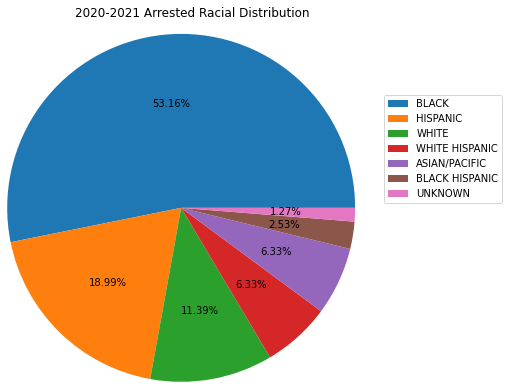

In [14]:
plt.figure(facecolor='white')
plt.pie(arr_new_stat,labels=['BLACK','HISPANIC','WHITE','WHITE HISPANIC','ASIAN/PACIFIC','BLACK HISPANIC','UNKNOWN'],
autopct = "%0.2f%%",labeldistance=None,radius= 2
)
plt.legend(loc='lower right', bbox_to_anchor=(1.5,.5 , .5, 1))
plt.title('2020-2021 Arrested Racial Distribution',x=.55,y=1.35)

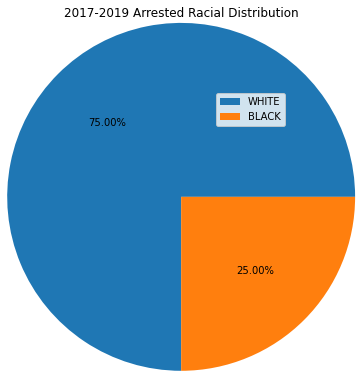

In [15]:
plt.figure(facecolor='white')
plt.pie(arr_old_merge['Race'].value_counts(normalize=True),labels=['WHITE','BLACK'],autopct = "%0.2f%%", radius= 2,
labeldistance=None
)
plt.title('2017-2019 Arrested Racial Distribution',x=.5,y=1.3)
plt.legend()

In [16]:
#Merging arrest total for easier plotting
arr_total = pd.merge(arr_old_merge,arr_new_merge,how='outer')

Text(0.5, 1.0, '2017-2021 AA Arrest Amount')

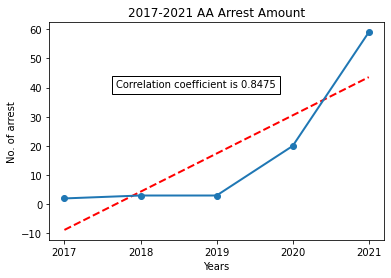

In [17]:
arr_years = arr_total.Year.unique()
arr_years.sort()
arr_values = list(arr_total['Year'].value_counts())
arr_values.sort(reverse=False)
arr_corr,_ = pearsonr(arr_years,arr_values)
a, b = np.polyfit(arr_years,arr_values,1)
fig, ax = plt.subplots()
plt.scatter(arr_years,arr_values)
plt.plot(arr_years,a*arr_years+b,color = 'red',linestyle ='--',linewidth = 2)
plt.plot(arr_years,arr_values,linewidth = 2)
plt.text(0.2,.7,f"Correlation coefficient is {arr_corr:.4f}",transform=ax.transAxes,bbox={"fc":"white"})
plt.xticks(np.arange(min(arr_years), max(arr_years)+1, 1.0))
plt.xlabel("Years")
plt.ylabel("No. of arrest")
plt.title("2017-2021 AA Arrest Amount")

Text(0.5, 1.0, '2017-2021 AA Complaint Amount')

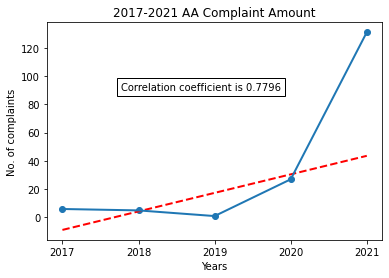

In [18]:
com_total = pd.merge(com_old_merge,com_new_merge,how='outer')
com_years = com_total.Year.unique()
com_years.sort()
com_values = com_total.groupby('Year').sum()
com_values = list(com_values['Anti-Asian'])
com_corr, _= pearsonr(com_years,com_values)
plt.scatter(com_years,com_values)
plt.plot(com_years,a*com_years+b,color = 'red',linestyle ='--',linewidth = 2)
plt.plot(com_years,com_values,linewidth = 2)
plt.xticks(np.arange(min(com_years), max(com_years)+1, 1.0))
plt.text(0.2,.7,f"Correlation coefficient is {com_corr:.4f}",transform=ax.transAxes,bbox={"fc":"white"})
plt.xlabel("Years")
plt.ylabel("No. of complaints")
plt.title("2017-2021 AA Complaint Amount")

According to the data distribution, anti-Asian motivated arrests and complaints kept a steady low number from 2017 to 2019, and the amounts for both spiked during the rise of the Covid pandemic around late 2019. In the arrest and complaint data, there is a positive correlation coefficient of 0.84 and 0.77 respectively, which implies that there is a strong correlation between Covid and the rise of anti-Asian crimes.

In the 2017-2019 racial distribution chart, there were 8 racial motivated arrest made, white people accounted for 75% and black people accounted for the rest of the 25%. Then in the 2020-2021 data, 72 arrests were made and 53% of them were made to Blacks, followed by Hispanics at 19% and Whites at 11%. These statistics shows that there is a large rise in Black on Asian crimes in New York City.
Looking at the most recent datas however, there might be an inaccuracy with the arrest racial data since the 2020-2021 data accounted for much more races compare to its older data. Either the NYPD used an umbrella to group their arrests made for their old data or it's accurate and there were only 2 racial groups committing these crimes.